# The Sparks Foundation

## Task 1 : Predict the percentage of student based on number of study hours

#### Step 1: Importing Python Libraries

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# This is just ot ignore warnings

import warnings as wgs
wgs.filterwarnings('ignore')


#### Step 2: Reading our dataset from url link

In [20]:

source = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(source)


In [21]:

# This allows us to view first 5 records of dataset from head

df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:

df.count()


Hours     25
Scores    25
dtype: int64

In [24]:

df.shape


(25, 2)

#### We can see data is a form of [ 25 x 2 ] Matrix

### Let's Check Statistical information

In [23]:

df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Step 3: Lets plot the graph and visualize our data

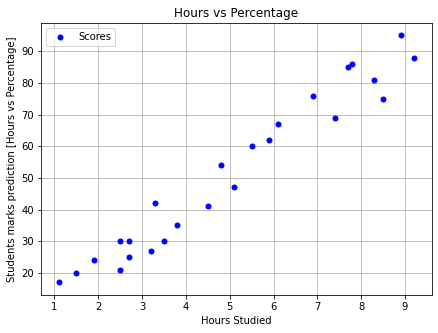

In [33]:

plt.rcParams["figure.figsize"] = [7,5]

df.plot(x='Hours', y='Scores', style='.',color='blue', markersize=10)

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Students marks prediction [Hours vs Percentage]')

plt.grid()
plt.show()


<AxesSubplot:xlabel='Hours'>

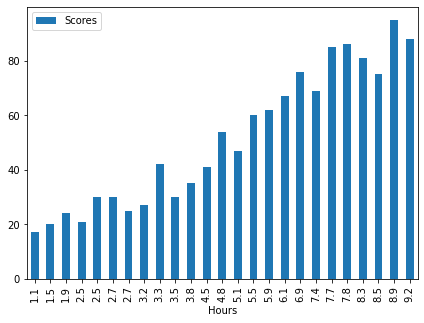

In [34]:
# Sorting x-axis in ascending order and check the plotted bar-graph for respective values


df.sort_values(['Hours'], axis=0, ascending=[True], inplace=True)

df.head(10)

df.plot.bar(x='Hours', y='Scores')


#### Step 4: Prepare data for model 

In [36]:

x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values


In [37]:

print(x)


[[1.1]
 [1.5]
 [1.9]
 [2.5]
 [2.5]
 [2.7]
 [2.7]
 [3.2]
 [3.3]
 [3.5]
 [3.8]
 [4.5]
 [4.8]
 [5.1]
 [5.5]
 [5.9]
 [6.1]
 [6.9]
 [7.4]
 [7.7]
 [7.8]
 [8.3]
 [8.5]
 [8.9]
 [9.2]]


In [38]:

print(y)


[17 20 24 21 30 30 25 27 42 30 35 41 54 47 60 62 67 76 69 85 86 81 75 95
 88]


## Training & Testing our data model 

#### Diving dataset into 4:1 ratio of 5 for training our model / algorithm & testing

In [40]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


## Train our Model

In [42]:

from sklearn.linear_model import LinearRegression
clf = LinearRegression()


In [43]:

clf.fit(x_train, y_train)


LinearRegression()

### Finding the best-fit line

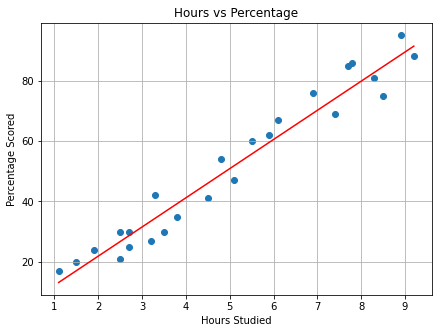

In [45]:

#plotting our regression line
line = clf.coef_*x + clf.intercept_


#plotting for the test data
plt.scatter(x,y)
plt.plot(x, line, color='r');

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')

plt.grid()
plt.show()


In [14]:

print(clf.intercept_)
print(clf.coef_)


2.5300405912062587
[9.66210145]


## Test our Model - making our predictions

In [48]:

y_pred = clf.predict(x_test)

compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [49]:

compare


,Actual,Predicted
0,30,28.617714
1,24,20.888033
2,85,76.928222
3,67,61.468859
4,41,46.009497


### Co-efficient of determination R^2 of prediction

In [50]:

clf.score(x_test, y_test)


0.9503831741928792

### Testing the data with values

In [51]:

hours = 9.25
own_pred = clf.predict([[hours]])

print('The predicted score if person studies for', hours, 'hours is', own_pred[0])


The predicted score if person studies for 9.25 hours is 91.904478976234


### Evaluating the Model

In [52]:

from sklearn import metrics

print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error 4.621333622532769
